In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation/train.csv
/kaggle/input/customer-segmentation/test.csv


Vamos a analizar primero los datos. Los tipos de datos por columna

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../input/customer-segmentation/train.csv")
data = data.dropna()
data.info()

target = list(data["Segmentation"].unique())
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Ahora vamos a ver como se distribuye los datos de la edad por cada segmento

<AxesSubplot:title={'center':'Age'}, xlabel='[Segmentation]'>

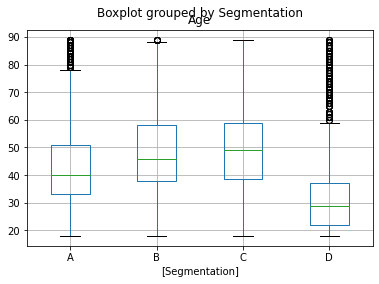

In [3]:
data.boxplot(column = ["Age"], by = ["Segmentation"])

Parece ser que el segmento C tiene una edad mediana mayor que el resto, aunque un poco mayor solamente que el segmento B. El segmento D parece ser el segmento con menor edad aunque hay muchos outliers. Ahora vamos a ver 

<AxesSubplot:title={'center':'Work_Experience'}, xlabel='[Segmentation]'>

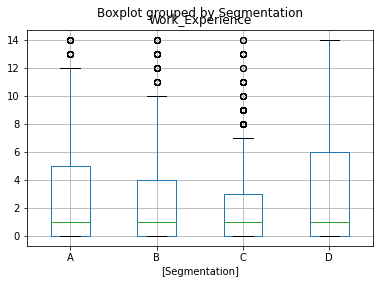

In [4]:
data.boxplot(column = ["Work_Experience"], by = ["Segmentation"])

Ahora vamos a ver como son los porcentajes de hombres y mujeres dentro de cada segmento

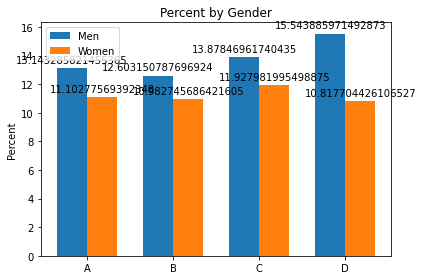

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [5]:
Segments = ["A", "B", "C", "D"]
Male = [len(data.loc[(data["Gender"] == "Male") & (data["Segmentation"] == "A")])/len(data)*100, len(data.loc[(data["Gender"] == "Male") & (data["Segmentation"] == "B")])/len(data)*100, len(data.loc[(data["Gender"] == "Male") & (data["Segmentation"] == "C")])/len(data)*100, len(data.loc[(data["Gender"] == "Male") & (data["Segmentation"] == "D")])/len(data)*100]
Female = [len(data.loc[(data["Gender"] == "Female") & (data["Segmentation"] == "A")])/len(data)*100, len(data.loc[(data["Gender"] == "Female") & (data["Segmentation"] == "B")])/len(data)*100, len(data.loc[(data["Gender"] == "Female") & (data["Segmentation"] == "C")])/len(data)*100, len(data.loc[(data["Gender"] == "Female") & (data["Segmentation"] == "D")])/len(data)*100]

x = np.arange(len(Segments))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Male, width, label='Men')
rects2 = ax.bar(x + width/2, Female, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Percent by Gender')
ax.set_xticks(x)
ax.set_xticklabels(Segments)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

data["Profession"].unique()

En todos los segmentos parece haber mas cantidad de hombres que de mujeres. Ahora vamos a ver como se distribuyen los datos de la profesion en cada segmento.

<BarContainer object of 8 artists>

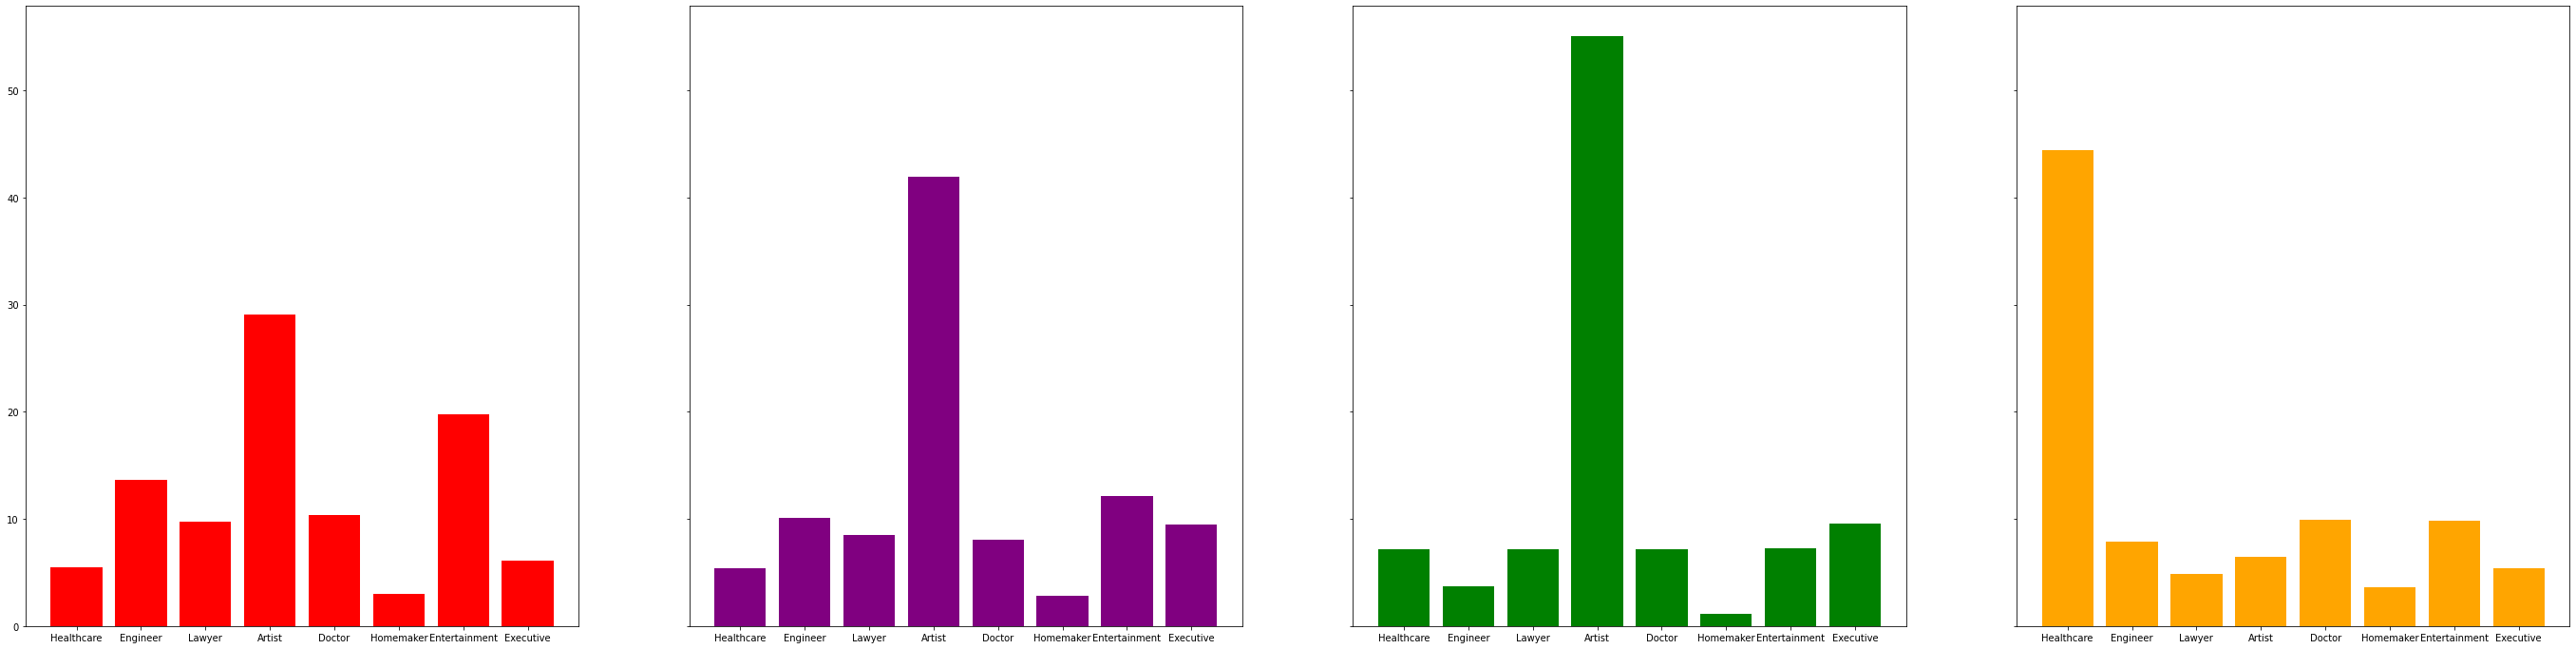

In [6]:
A_Healthcare = len(data.loc[(data["Profession"] == "Healthcare") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])
A_Engineer = len(data.loc[(data["Profession"] == "Engineer") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])
A_Lawyer = len(data.loc[(data["Profession"] == "Lawyer") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])
A_Artist = len(data.loc[(data["Profession"] == "Artist") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])
A_Doctor = len(data.loc[(data["Profession"] == "Doctor") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])
A_Homemaker = len(data.loc[(data["Profession"] == "Homemaker") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])
A_Entertainment = len(data.loc[(data["Profession"] == "Entertainment") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])
A_Marketing = len(data.loc[(data["Profession"] == "Marketing") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])
A_Executive = len(data.loc[(data["Profession"] == "Executive") & (data["Segmentation"] == "A")])/len(data.loc[data["Segmentation"] == "A"])

B_Healthcare = len(data.loc[(data["Profession"] == "Healthcare") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])
B_Engineer = len(data.loc[(data["Profession"] == "Engineer") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])
B_Lawyer = len(data.loc[(data["Profession"] == "Lawyer") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])
B_Artist = len(data.loc[(data["Profession"] == "Artist") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])
B_Doctor = len(data.loc[(data["Profession"] == "Doctor") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])
B_Homemaker = len(data.loc[(data["Profession"] == "Homemaker") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])
B_Entertainment = len(data.loc[(data["Profession"] == "Entertainment") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])
B_Marketing = len(data.loc[(data["Profession"] == "Marketing") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])
B_Executive = len(data.loc[(data["Profession"] == "Executive") & (data["Segmentation"] == "B")])/len(data.loc[data["Segmentation"] == "B"])

C_Healthcare = len(data.loc[(data["Profession"] == "Healthcare") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])
C_Engineer = len(data.loc[(data["Profession"] == "Engineer") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])
C_Lawyer = len(data.loc[(data["Profession"] == "Lawyer") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])
C_Artist = len(data.loc[(data["Profession"] == "Artist") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])
C_Doctor = len(data.loc[(data["Profession"] == "Doctor") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])
C_Homemaker = len(data.loc[(data["Profession"] == "Homemaker") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])
C_Entertainment = len(data.loc[(data["Profession"] == "Entertainment") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])
C_Marketing = len(data.loc[(data["Profession"] == "Marketing") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])
C_Executive = len(data.loc[(data["Profession"] == "Executive") & (data["Segmentation"] == "C")])/len(data.loc[data["Segmentation"] == "C"])

D_Healthcare = len(data.loc[(data["Profession"] == "Healthcare") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])
D_Engineer = len(data.loc[(data["Profession"] == "Engineer") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])
D_Lawyer = len(data.loc[(data["Profession"] == "Lawyer") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])
D_Artist = len(data.loc[(data["Profession"] == "Artist") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])
D_Doctor = len(data.loc[(data["Profession"] == "Doctor") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])
D_Homemaker = len(data.loc[(data["Profession"] == "Homemaker") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])
D_Entertainment = len(data.loc[(data["Profession"] == "Entertainment") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])
D_Marketing = len(data.loc[(data["Profession"] == "Entertainment") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])
D_Executive = len(data.loc[(data["Profession"] == "Executive") & (data["Segmentation"] == "D")])/len(data.loc[data["Segmentation"] == "D"])



data_A = {"Healthcare": A_Healthcare*100, "Engineer": A_Engineer*100, "Lawyer": A_Lawyer*100, "Artist": A_Artist*100, "Doctor": A_Doctor*100, "Homemaker": A_Homemaker*100, "Entertainment": A_Entertainment*100, "Executive": A_Executive*100}
data_B = {"Healthcare": B_Healthcare*100, "Engineer": B_Engineer*100, "Lawyer": B_Lawyer*100, "Artist": B_Artist*100, "Doctor": B_Doctor*100, "Homemaker": B_Homemaker*100, "Entertainment": B_Entertainment*100, "Executive": B_Executive*100}
data_C = {"Healthcare": C_Healthcare*100, "Engineer": C_Engineer*100, "Lawyer": C_Lawyer*100, "Artist": C_Artist*100, "Doctor": C_Doctor*100, "Homemaker": C_Homemaker*100, "Entertainment": C_Entertainment*100, "Executive": C_Executive*100}
data_D = {"Healthcare": D_Healthcare*100, "Engineer": D_Engineer*100, "Lawyer": D_Lawyer*100, "Artist": D_Artist*100, "Doctor": D_Doctor*100, "Homemaker": D_Homemaker*100, "Entertainment": D_Entertainment*100, "Executive": D_Executive*100}

fig, axs = plt.subplots(1, 4, figsize=(48, 12), sharey=True)
axs[0].bar(list(data_A.keys()), list(data_A.values()), color = "red")
axs[1].bar(list(data_B.keys()), list(data_B.values()), color = "purple")
axs[2].bar(list(data_C.keys()), list(data_C.values()), color = "green")
axs[3].bar(list(data_D.keys()), list(data_D.values()), color = "orange")

En tres segmentos, en especifico en los segmentos A, B y C, El grupo que mas aparece es el de los Artistas. Aunque en el segmento D el grupo que tiene mayor preponderancia es el grupo de los medicos.

Ahora veremos el porcentaje de casados y no casados en cada segmento

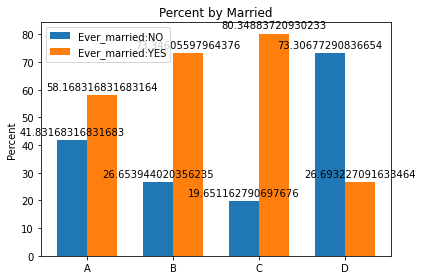

In [7]:
Ever_married_NO_A = len(data.loc[(data["Segmentation"] == "A") & (data["Ever_Married"] == "No")])/len(data.loc[data["Segmentation"] == "A"])
Ever_married_NO_B = len(data.loc[(data["Segmentation"] == "B") & (data["Ever_Married"] == "No")])/len(data.loc[data["Segmentation"] == "B"])
Ever_married_NO_C = len(data.loc[(data["Segmentation"] == "C") & (data["Ever_Married"] == "No")])/len(data.loc[data["Segmentation"] == "C"])
Ever_married_NO_D = len(data.loc[(data["Segmentation"] == "D") & (data["Ever_Married"] == "No")])/len(data.loc[data["Segmentation"] == "D"])

Ever_married_YES_A = len(data.loc[(data["Segmentation"] == "A") & (data["Ever_Married"] == "Yes")])/len(data.loc[data["Segmentation"] == "A"])
Ever_married_YES_B = len(data.loc[(data["Segmentation"] == "B") & (data["Ever_Married"] == "Yes")])/len(data.loc[data["Segmentation"] == "B"])
Ever_married_YES_C = len(data.loc[(data["Segmentation"] == "C") & (data["Ever_Married"] == "Yes")])/len(data.loc[data["Segmentation"] == "C"])
Ever_married_YES_D = len(data.loc[(data["Segmentation"] == "D") & (data["Ever_Married"] == "Yes")])/len(data.loc[data["Segmentation"] == "D"])

Segments = ["A", "B", "C", "D"]
NO = [Ever_married_NO_A*100, Ever_married_NO_B*100, Ever_married_NO_C*100, Ever_married_NO_D*100]
YES = [Ever_married_YES_A*100, Ever_married_YES_B*100, Ever_married_YES_C*100, Ever_married_YES_D*100]


x = np.arange(len(Segments))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, NO, width, label='Ever_married:NO')
rects2 = ax.bar(x + width/2, YES, width, label='Ever_married:YES')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Percent by Married')
ax.set_xticks(x)
ax.set_xticklabels(Segments)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Pareciera ser que en casi todos los segmentos menos en el D, predomina el grupo de los que por lo menos una vez sea han casado.

Ahora vamos a ver como se distribuye el tamaño de la familia en cada segmento

<AxesSubplot:title={'center':'Family_Size'}, xlabel='[Segmentation]'>

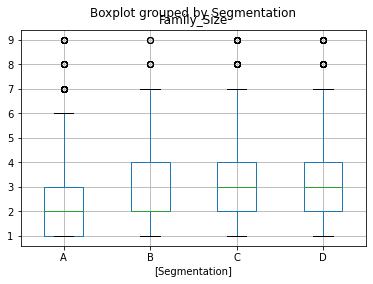

In [8]:
data.boxplot(column = ["Family_Size"], by = ["Segmentation"])

A continuacion lo que vamos a realizar es lo siguiente: Vamos a considerar varios modelos de clasificacion y vamos a elegir aquel modelo que mejor prediga los datos de una nueva muestra.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
len(data)

6665

Primero vamos a considerar el modelo de Linear Discriminant Analysis

Primero prepararemos los datos de modo de convertir los datos nominales en datos numericos. Luego entrenamos el modelo con todas las observaciones para ver si nos entrena de forma adecuada y calcularemos las probabilidades a priori y demas.

In [10]:
for column in data.columns:
  if data[column].dtype == type(object):
    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])

X = data.drop(["ID", "Segmentation"], axis = 1).to_numpy()
Y = data["Segmentation"].to_numpy().reshape(len(data), 1)

LDA = LinearDiscriminantAnalysis()
LDA.fit(X, Y)

y_pred = LDA.predict(X).tolist()
y_true = Y.T.tolist()[0]

predictions = pd.DataFrame(data = {"y_real": y_true, "y_pred": y_pred})

confusion_matrix(y_true = y_true, y_pred = y_pred, labels = [0,1,2,3])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[ 782,  133,  341,  360],
       [ 524,  189,  665,  194],
       [ 268,  135, 1091,  226],
       [ 337,   68,   90, 1262]])

In [11]:
predictions

,y_real,y_pred
0,3,3
1,1,1
2,1,2
3,2,2
4,2,3
...,...,...
6660,1,2
6661,3,3
6662,3,3
6663,1,3


In [12]:
LDA.priors_ #Probabilidades a priori de cada clase

array([0.24246062, 0.23585896, 0.25806452, 0.2636159 ])

Interesante parece ser que el segmento D es el segmento que tiene mas observaciones en forma relativa

In [13]:
LDA.means_ #Media de cada predictor dentro de cada clase

array([[ 0.54207921,  0.58168317, 44.42141089,  0.63428218,  2.57240099,
         2.88861386,  1.53341584,  2.43193069,  4.12190594],
       [ 0.53435115,  0.73346056, 48.11323155,  0.7321883 ,  2.17938931,
         2.3937659 ,  1.16475827,  2.68256997,  4.19211196],
       [ 0.5377907 ,  0.80348837, 49.32790698,  0.83372093,  1.81162791,
         2.2244186 ,  0.86046512,  2.96162791,  4.43372093],
       [ 0.58964143,  0.26693227, 32.95674445,  0.3636881 ,  4.15651679,
         2.99715424,  1.82868526,  3.24132043,  3.96812749]])

Ahora lo que vamos a calcular es la matriz de confusion del modelo, pero ahoa vamos a dividi la muestra en entrenamiento y prueba de modo que nos permita testear el modelo para ver el nivel de prediccion con nuevas observaciones con las que no fue entrenado

In [14]:
LDA = LinearDiscriminantAnalysis()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, )
LDA.fit(X_train, Y_train)

Y_test = Y_test.T.tolist()[0]
y_pred = LDA.predict(X_test).tolist()

confusion = confusion_matrix(Y_test, y_pred, labels = [0, 1, 2, 3])

sum_confusion = []
for k in range(0, 3):
  sum_confusion.append(sum(confusion.tolist()[k]))

accuracy = (confusion[0][0] + confusion[1][1] + confusion[2][2] + confusion[3][3])/sum(sum_confusion)
confusion

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[216,  67, 102, 125],
       [142,  70, 204,  62],
       [ 63,  58, 323,  58],
       [ 86,  22,  29, 373]])

In [15]:
accuracy

0.6590604026845638

Vemos que el accuracy del modelo se encuentra alrededor del 65%. Ahora vamos a considerar el modelo Quadratic Discriminant Analysis

In [16]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, Y_train)

y_pred_QDA = QDA.predict(X_test).tolist()

confusion_QDA = confusion_matrix(Y_test, y_pred_QDA, labels = [0,1,2,3])

sum_confusion_QDA = []

for k in range(0, 3):
  sum_confusion_QDA.append(sum(confusion_QDA.tolist()[k]))
accuracy_QDA = (confusion_QDA[0][0] + confusion_QDA[1][1] + confusion_QDA[2][2] + confusion_QDA[3][3])/sum(sum_confusion_QDA)
accuracy_QDA

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6550335570469799

Vemos con el Accuracy de QuadraticDiscriminantAnalysis es casi el mismo que el LinearDiscriminantAnalysis. Pero lo supera ligeramente. Ahora vamos a considerar otro modelo

In [17]:
KNN = KNeighborsClassifier(n_neighbors = 15)
KNN.fit(X_train, Y_train)

y_pred_KNN = KNN.predict(X_test)
confusion_KNN = confusion_matrix(Y_test, y_pred_KNN, labels = [0,1,2,3])

sum_confusion_KNN = []

for i in range(0, 3):
  sum_confusion_KNN.append(sum(confusion_KNN.tolist()[i]))
accuracy_KNN = (confusion_KNN[0][0] + confusion_KNN[1][1] + confusion_KNN[2][2] + confusion_KNN[3][3])/sum(sum_confusion_KNN)
accuracy_KNN

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6550335570469799

Vemos que con un gran numero de observaciones cercanas elegidas como parametro para este modelo obtenemos un desempeño mas pobre que los dos modelos antes mencionados. Lo que vamos a hacer es realizar un grafico para los distintos acurracys para distintos valores de n_neighbors elegidos

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0.5, 0, 'n_neighbors')

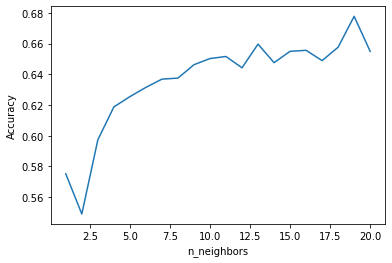

In [18]:
accuracy_list_KNN = []
for i in range(1, 21):
  KNN = KNeighborsClassifier(n_neighbors = i)
  KNN.fit(X_train, Y_train)

  y_pred_KNN = KNN.predict(X_test)
  confusion_KNN = confusion_matrix(Y_test, y_pred_KNN, labels = [0,1,2,3])

  sum_confusion_KNN = []

  for i in range(0, 3):
    sum_confusion_KNN.append(sum(confusion_KNN.tolist()[i]))
  accuracy_KNN = (confusion_KNN[0][0] + confusion_KNN[1][1] + confusion_KNN[2][2] + confusion_KNN[3][3])/sum(sum_confusion_KNN)
  accuracy_list_KNN.append(accuracy_KNN)
len(accuracy_list_KNN)

list(np.linspace(1, 20, 20))

plt.plot(list(np.linspace(1, 20, 20)), accuracy_list_KNN)
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")

Vemos como un gran numeros de observaciones cercanas tienden a mejorar la prediccion pero esto tendera a tener mayor sesgo. Por lo tanto descartaremos este modelo

In [19]:
TDC = DecisionTreeClassifier(max_depth = 7)

TDC.fit(X_train, Y_train)
y_pred_TDC = TDC.predict(X_test)

confusion_TDC = confusion_matrix(Y_test, y_pred_TDC)
sum_confusion_TDC = []

for i in range(0, 3):
  sum_confusion_TDC.append(sum(confusion_TDC.tolist()[i]))
accuracy_TDC = (confusion_TDC[0][0] + confusion_TDC[1][1] + confusion_TDC[2][2] + confusion_TDC[3][3])/sum(sum_confusion_TDC)
accuracy_TDC

0.676510067114094

Vemos como conseguimos un nivel de prediccion bastante decente con este arbol de clasificacion. De todas formas supera en pocos puntos porcentuales a los otros modelos

<AxesSubplot:>

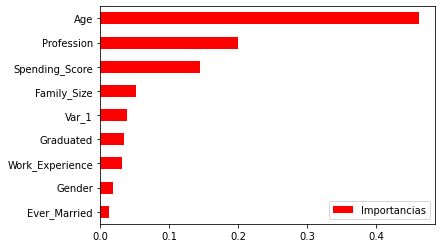

In [20]:
Importancia = pd.DataFrame(data = {"Importancias": TDC.feature_importances_.tolist()}, index = list(data.columns[1:10]))
Importancia.sort_values("Importancias", axis = 0, ascending = True).plot(kind = "barh", color = "r")

In [21]:
RF = RandomForestClassifier(max_features = int(np.sqrt(9)), random_state = 1)

RF.fit(X_train, Y_train)
y_pred_RF = RF.predict(X_test)
confusion_RF = confusion_matrix(Y_test, y_pred_RF)
sum_confusion_RF = []

for i in range(0, 3):
  sum_confusion_RF.append(sum(confusion_RF.tolist()[i]))
accuracy_RF = (confusion_RF[0][0] + confusion_RF[1][1] + confusion_RF[2][2] + confusion_RF[3][3])/sum(sum_confusion_RF)
accuracy_RF

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6530201342281879

Tuvimos un bajo nivel de prediccion con random forest teniendo en cuenta los otros modelos. Pero ahora vamos a probar con Boosting

In [22]:
Boosting = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01)
Boosting.fit(X_train, Y_train)

y_pred_Boosting = Boosting.predict(X_test)
confusion_Boosting = confusion_matrix(Y_test, y_pred_Boosting)

sum_confusion_Boosting = []

for i in range(0, 3):
  sum_confusion_Boosting.append(sum(confusion_Boosting.tolist()[i]))
accuracy_Boosting = (confusion_Boosting[0][0] + confusion_Boosting[1][1] + confusion_Boosting[2][2] + confusion_Boosting[3][3])/sum(sum_confusion_Boosting)
accuracy_Boosting

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7221476510067114

Vemos a priori que Boosting es el modelo con mejor nivel de prediccion

<AxesSubplot:>

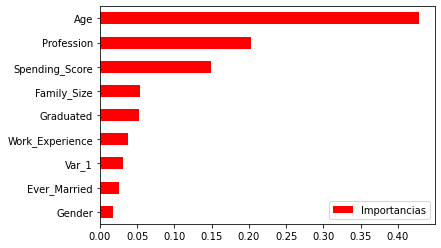

In [23]:
Importancia_Boosting = pd.DataFrame(data = {"Importancias": Boosting.feature_importances_.tolist()}, index = list(data.columns[1:10]))
Importancia_Boosting.sort_values("Importancias", axis = 0, ascending = True).plot(kind = "barh", color = "r")

Como el nivel de prediccion puede variar segun el tamaño de entrenamiento y prueba, vamos a entrenar los modelos anteriores con distintos tamaño de entrenamiento y prueba y vamos a calcular el acurracy para cada tamaño en cada modelo. Vamos a elegir el modelo que tenga mayor nivel de accuracy para este conjunto de datos

In [24]:
size = list(np.linspace(0.5, 0.95, num = 10))

LDA_accuracy = []
QDA_accuracy = []
TDC_accuracy = []
RF_accuracy = []
BS_accuracy = []

for l in size:
  LDA = LinearDiscriminantAnalysis()
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = l, )
  LDA.fit(X_train, Y_train)

  Y_test = Y_test.T.tolist()[0]
  y_pred = LDA.predict(X_test).tolist()

  confusion = confusion_matrix(Y_test, y_pred, labels = [0, 1, 2, 3])
  confusion

  sum_confusion = []
  for k in range(0, 3):
    sum_confusion.append(sum(confusion.tolist()[k]))

  accuracy = (confusion[0][0] + confusion[1][1] + confusion[2][2] + confusion[3][3])/sum(sum_confusion)
  LDA_accuracy.append(accuracy)

for q in size:
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = q, )
  QDA = QuadraticDiscriminantAnalysis()
  QDA.fit(X_train, Y_train)

  y_pred_QDA = QDA.predict(X_test).tolist()

  confusion_QDA = confusion_matrix(Y_test, y_pred_QDA, labels = [0,1,2,3])

  sum_confusion_QDA = []

  for k in range(0, 3):
    sum_confusion_QDA.append(sum(confusion_QDA.tolist()[k]))
  accuracy_QDA = (confusion_QDA[0][0] + confusion_QDA[1][1] + confusion_QDA[2][2] + confusion_QDA[3][3])/sum(sum_confusion_QDA)
  QDA_accuracy.append(accuracy_QDA)

for t in size:
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t, )
  TDC = DecisionTreeClassifier(max_depth = 7)

  TDC.fit(X_train, Y_train)
  y_pred_TDC = TDC.predict(X_test)

  confusion_TDC = confusion_matrix(Y_test, y_pred_TDC)
  sum_confusion_TDC = []

  for i in range(0, 3):
    sum_confusion_TDC.append(sum(confusion_TDC.tolist()[i]))
  accuracy_TDC = (confusion_TDC[0][0] + confusion_TDC[1][1] + confusion_TDC[2][2] + confusion_TDC[3][3])/sum(sum_confusion_TDC)
  TDC_accuracy.append(accuracy_TDC)

for r in size:
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = r, )
  RF = RandomForestClassifier(max_features = int(np.sqrt(9)), random_state = 1)
  RF.fit(X_train, Y_train)
  y_pred_RF = RF.predict(X_test)
  confusion_RF = confusion_matrix(Y_test, y_pred_RF)
  sum_confusion_RF = []

  for i in range(0, 3):
    sum_confusion_RF.append(sum(confusion_RF.tolist()[i]))
  accuracy_RF = (confusion_RF[0][0] + confusion_RF[1][1] + confusion_RF[2][2] + confusion_RF[3][3])/sum(sum_confusion_RF)
  RF_accuracy.append(accuracy_RF)

for b in size:
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = b, )
  Boosting = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01)
  Boosting.fit(X_train, Y_train)

  y_pred_Boosting = Boosting.predict(X_test)
  confusion_Boosting = confusion_matrix(Y_test, y_pred_Boosting)

  sum_confusion_Boosting = []

  for i in range(0, 3):
    sum_confusion_Boosting.append(sum(confusion_Boosting.tolist()[i]))
  accuracy_Boosting = (confusion_Boosting[0][0] + confusion_Boosting[1][1] + confusion_Boosting[2][2] + confusion_Boosting[3][3])/sum(sum_confusion_Boosting)
  BS_accuracy.append(accuracy_Boosting)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

<AxesSubplot:>

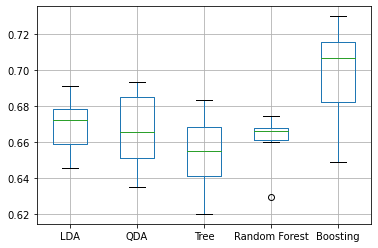

In [25]:
data_accuracy = pd.DataFrame(data = {"LDA": LDA_accuracy, "QDA": QDA_accuracy, "Tree": TDC_accuracy, "Random Forest": RF_accuracy, "Boosting": BS_accuracy})

data_accuracy.boxplot(column = ["LDA", "QDA", "Tree", "Random Forest", "Boosting"])

Vemos como Boosting supera a los otros modelos entrenados. Finalmente nos decantamos por este modelo. Vamos a entrenar boosting con todas las obsevaciones para ponerlo en produccion

Podemos ver como Boosting tiene un mejor desempeño que el resto de los otros modelos. Por ello vamos a entrenar Boosting con todas las observaciones para 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

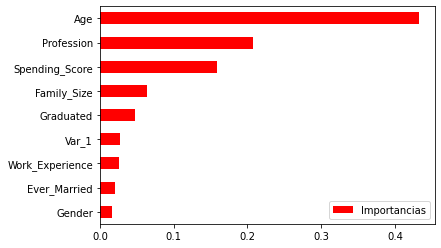

In [26]:
Boosting_prod = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01)
Boosting_prod.fit(X, Y)

y_pred = Boosting_prod.predict(X)
Importancia_Boosting = pd.DataFrame(data = {"Importancias": Boosting_prod.feature_importances_.tolist()}, index = list(data.columns[1:10]))
Importancia_Boosting.sort_values("Importancias", axis = 0, ascending = True).plot(kind = "barh", color = "r")

Aca podemos ver la importancia final de cada caracteristica.

Ahora vamos a clasificar el grupo correcto de los nuevos clientes

In [27]:
data2 = pd.read_csv("../input/customer-segmentation/test.csv")
data2 = data2.dropna()
data2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2154 non-null   int64  
 1   Gender           2154 non-null   object 
 2   Ever_Married     2154 non-null   object 
 3   Age              2154 non-null   int64  
 4   Graduated        2154 non-null   object 
 5   Profession       2154 non-null   object 
 6   Work_Experience  2154 non-null   float64
 7   Spending_Score   2154 non-null   object 
 8   Family_Size      2154 non-null   float64
 9   Var_1            2154 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 185.1+ KB


In [29]:
for column in data2.columns:
  if data2[column].dtype == type(object):
    data2[column] = data2[column].replace(np.nan, "none", regex = True)
    data2[column] = le.fit_transform(y = data2[column].values)

X_test_2 = data2.drop(["ID"], axis = 1).to_numpy()

data2["Segmentation predict"] = Boosting_prod.predict(X_test_2)
data2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation predict
0,458989,0,1,36,1,2,0.0,2,1.0,5,0
1,458994,1,1,37,1,5,8.0,0,4.0,5,1
3,459000,1,1,59,0,4,11.0,1,2.0,5,2
5,459003,1,1,47,1,1,0.0,1,5.0,3,1
6,459005,1,1,61,1,1,5.0,2,3.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,0,0,35,1,3,1.0,2,2.0,5,0
2622,467954,1,0,29,0,5,9.0,2,4.0,5,3
2623,467958,0,0,35,1,1,1.0,2,1.0,5,0
2625,467961,1,1,47,1,4,1.0,1,5.0,3,1


Con esto pudimos clasificar a los clientes nuevos en distintos segmentos dada la nueva base de datos que es lo que se pedia. 

Donde 0 pertenece a la clase A, 1 a la clase B, 2 a la clase C, y 3 a la clase D.

En la columna genero el valor 0 pertenece a la mujer y el 1 al hombre.
En la columna de graduado el valor 1 corresponde a los graduados, y el 0 a los que no estan graduados.
En la columna de Profession el valor 0 pertenece a los artistas, 1 pertenece a Doctor, el valor 2 pertenece a los ingenieros, el valor 3 al grupo de entretenimiento, el valor 4 al grupo de los ejecutivos, el valor 5 pertenece al grupo de los healthcare, el grupo 6 le pertenecen a los que realizan tareas del hogar, el grupo 7 pertenece a los abogados, y el grupo 8 le pertenecen a los que estan en Marketing.

En la columna de Spending_Score, el valor 0 pertenece a Average, el valor 1 pertenece a High, y el valor 2 pertenece a Low.

En la columna Var_1, los valores del 0 al 6, pertenecen a las categorias de Cat_1 a Cat_7 respectivamente